In [1]:
from experiment import PavlovTiming
from model import ValueRNN
from train import make_dataloader, train_model, probe_model
from plotting import plot_trials, plot_loss, plot_predictions, plot_hidden_activity

### Create Experiment

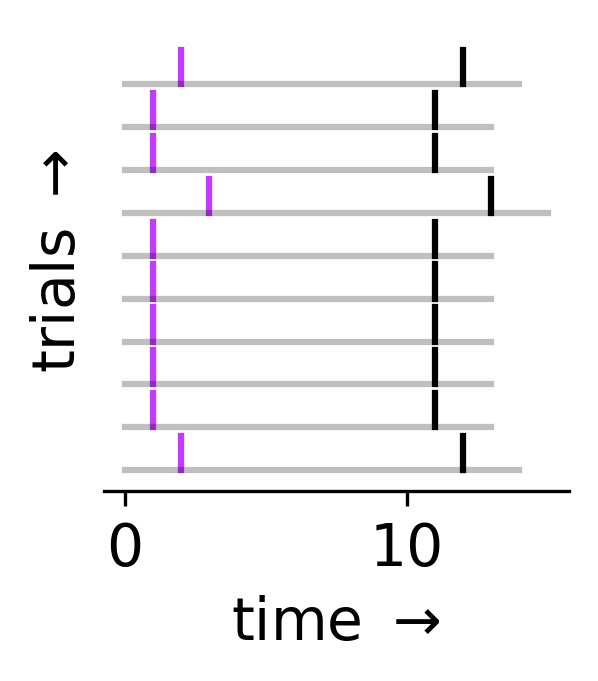

In [2]:
E = PavlovTiming(ncues=1)
plot_trials(E.trials[:10])

### Create Model

In [3]:
hidden_size = 2 # number of hidden neurons
gamma = 0.5     # discount rate
model = ValueRNN(input_size=E.ncues + int(E.include_reward),
                 output_size=7,
                 hidden_size=hidden_size, 
                 gamma=gamma)
print('model # parameters: {}'.format(model.n_parameters()))

model # parameters: 48


### Training Model

Epoch 0, 0.0818
Epoch 200, 0.0776
Epoch 400, 0.0769
Epoch 600, 0.0763
Epoch 800, 0.0760
Epoch 1000, 0.0759
Epoch 1200, 0.0758
Epoch 1400, 0.0757
Epoch 1600, 0.0756
Epoch 1800, 0.0756
Epoch 2000, 0.0755
Epoch 2200, 0.0754
Epoch 2400, 0.0752
Epoch 2600, 0.0751
Epoch 2800, 0.0750
Epoch 3000, 0.0749
Epoch 3200, 0.0748
Epoch 3400, 0.0747
Epoch 3600, 0.0745
Epoch 3800, 0.0744
Epoch 4000, 0.0743
Epoch 4200, 0.0741
Epoch 4400, 0.0740
Epoch 4600, 0.0739
Epoch 4800, 0.0738
Done! Best loss: 0.07370975445955992


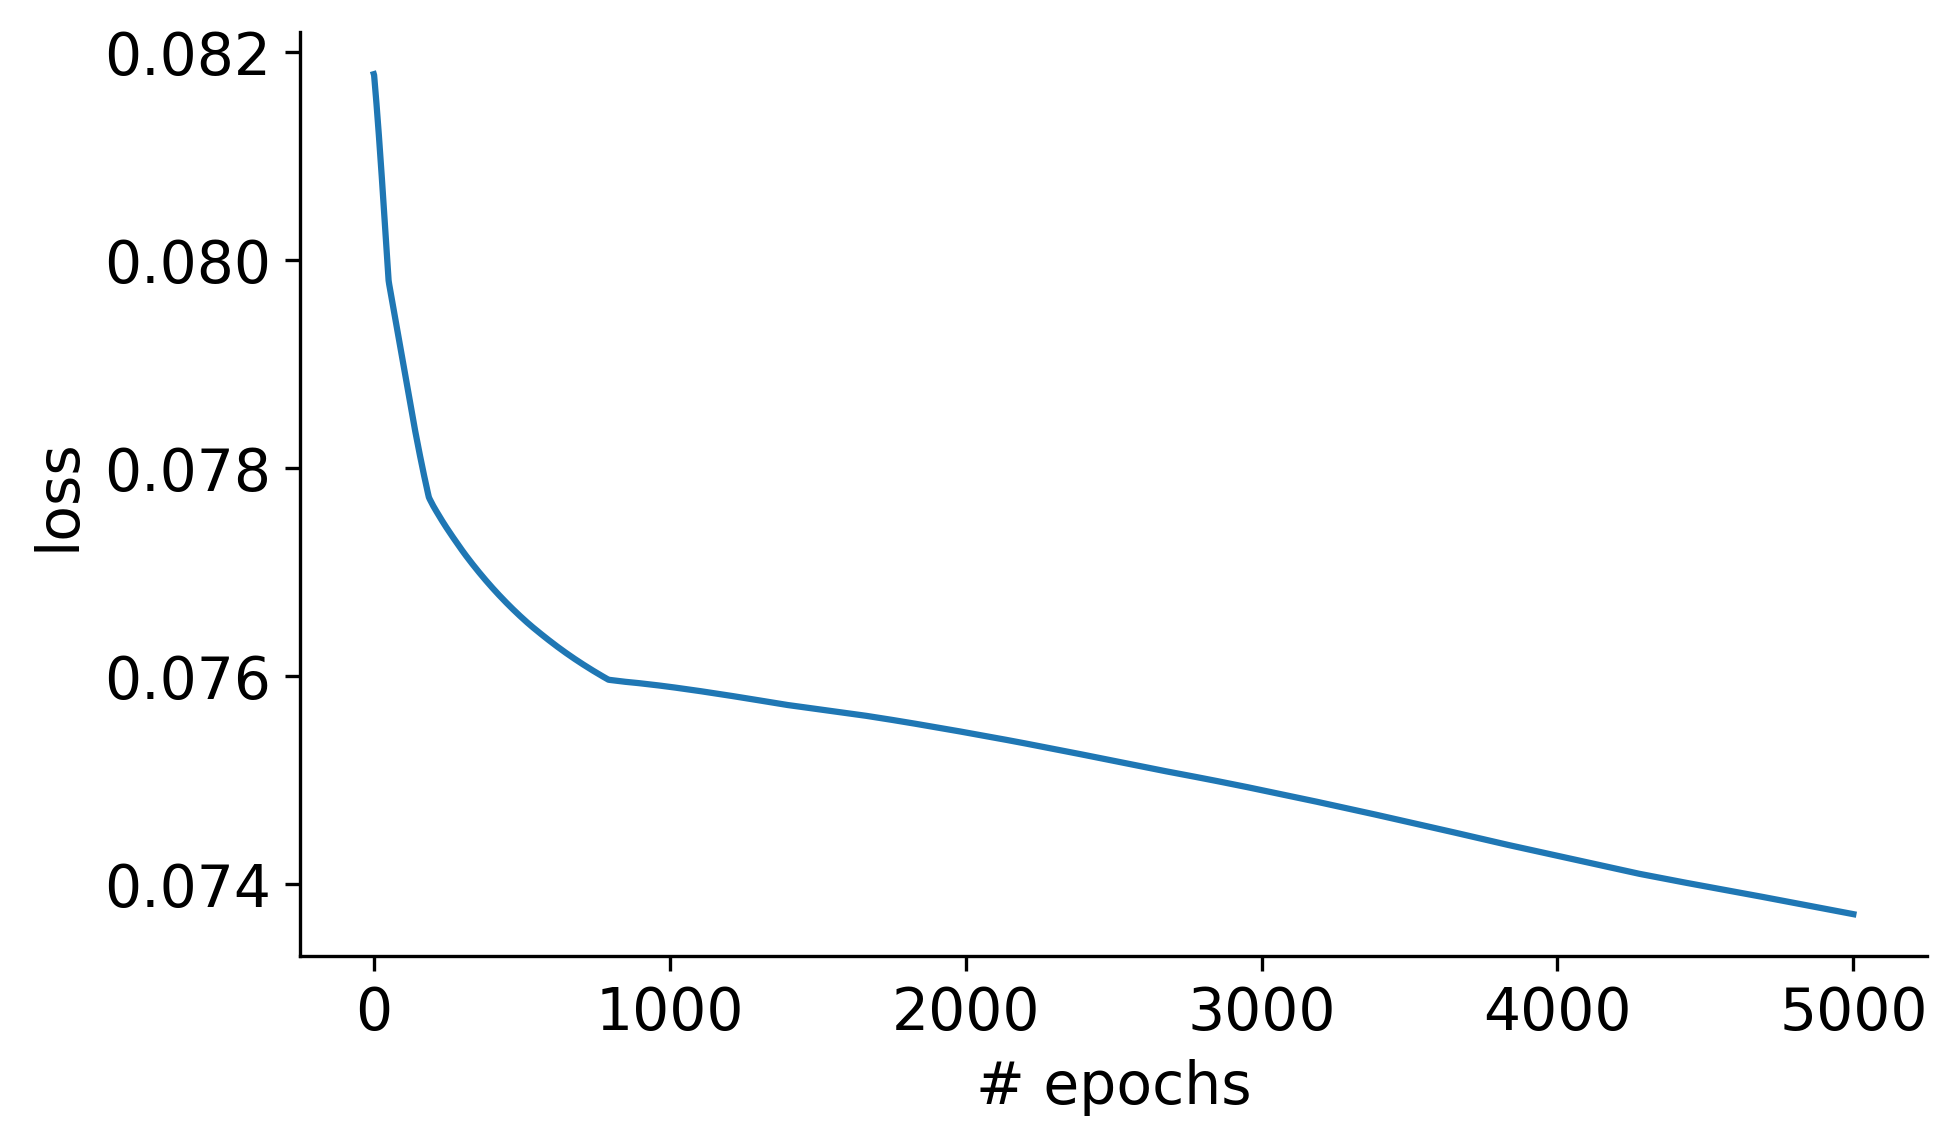

In [4]:
lr = 0.01
batch_size = 12
dataloader = make_dataloader(E, batch_size=batch_size)
scores = train_model(model, dataloader, lr=lr, epochs=5000, print_every=200)
plot_loss(scores)

### Plotting predicted and actual values

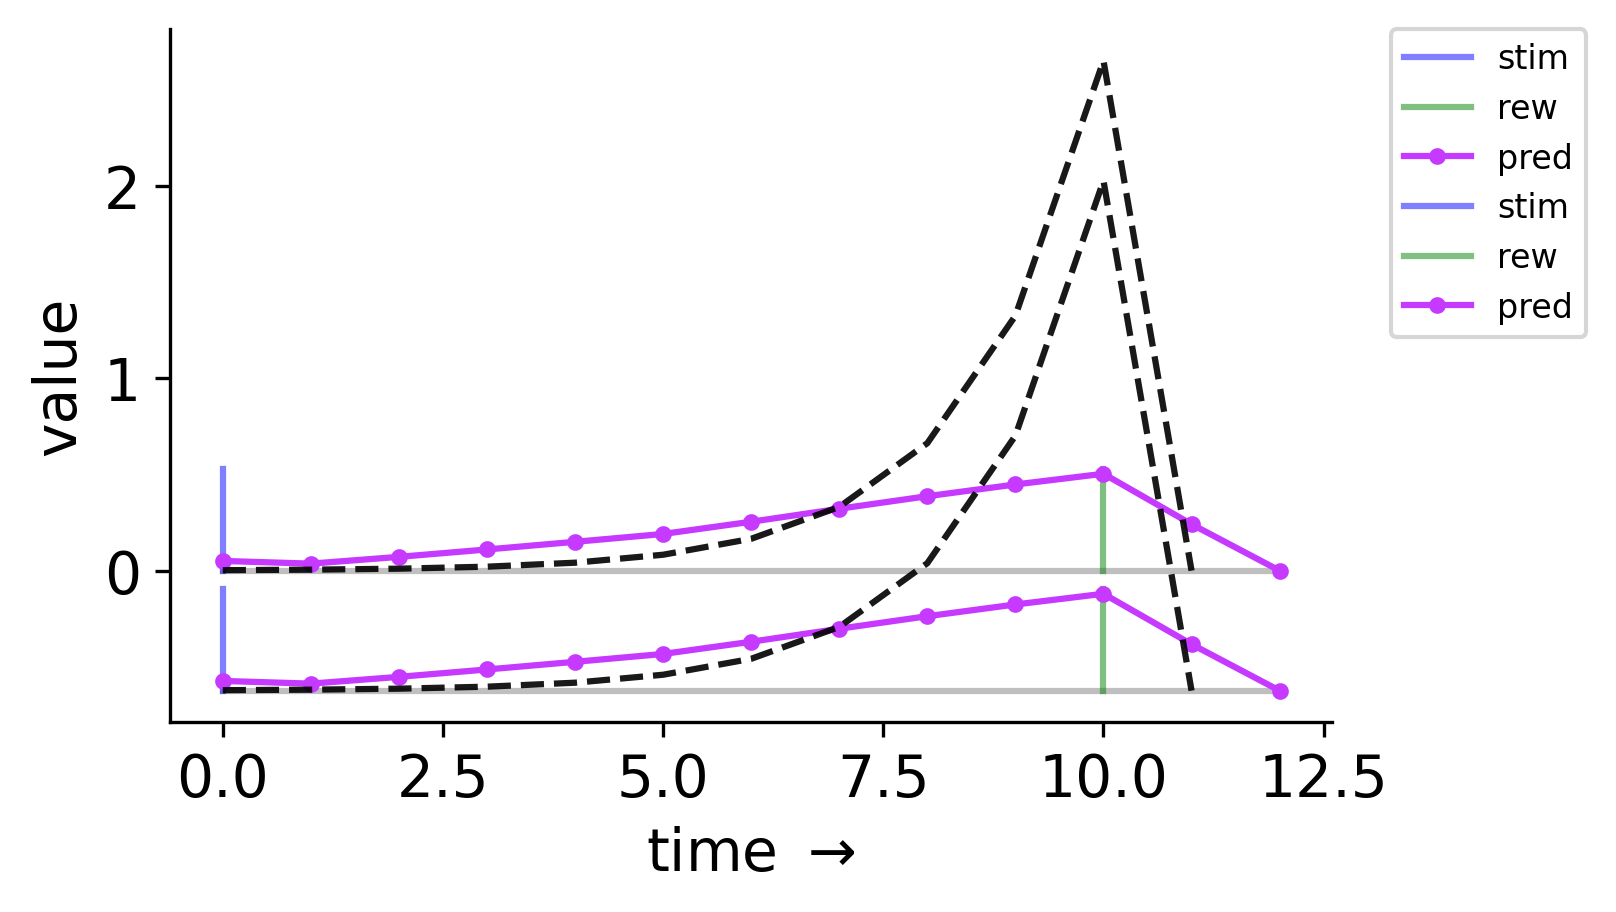

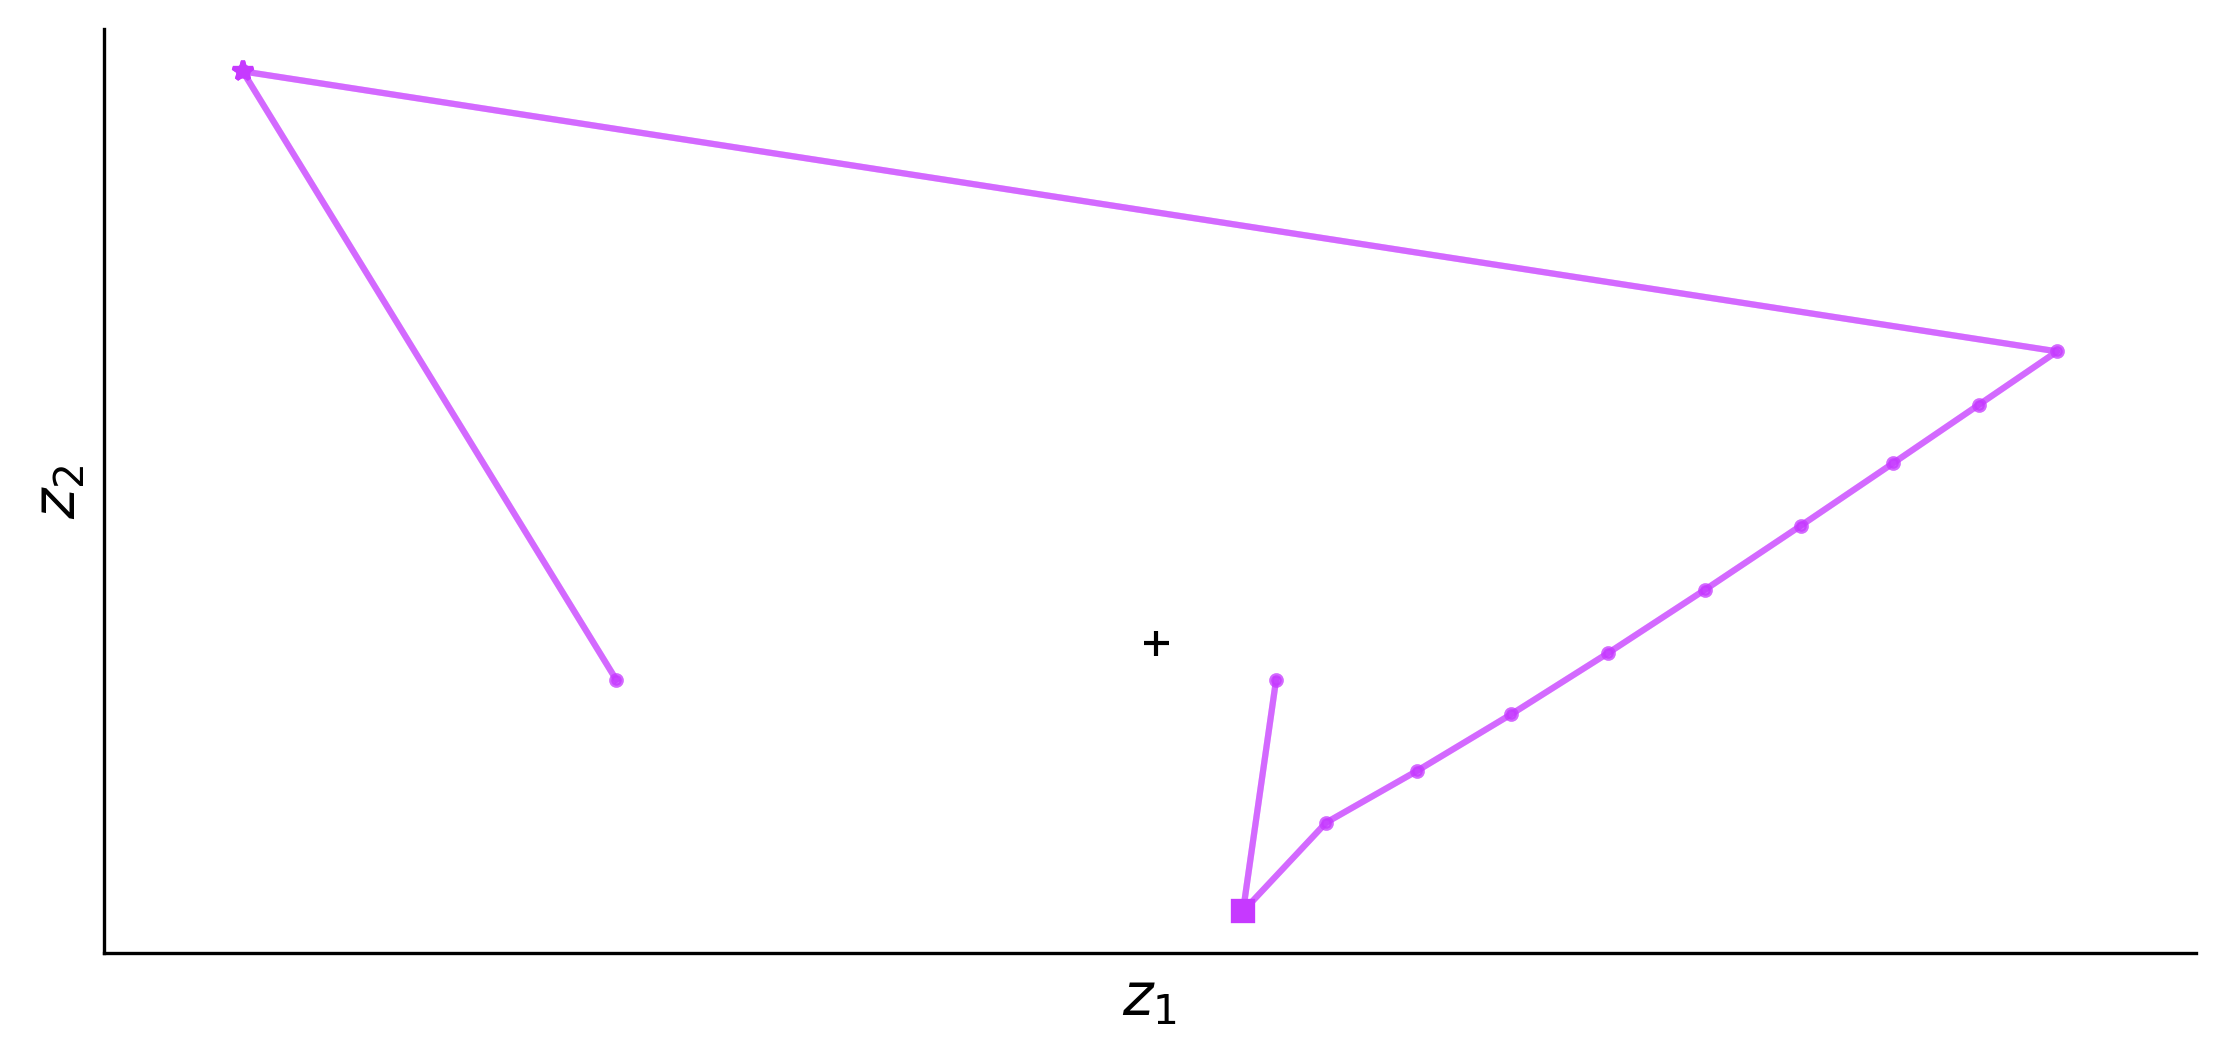

In [5]:
responses = probe_model(model, dataloader)
plot_predictions(responses[:2], 'value', gamma=model.gamma)
plot_hidden_activity(responses[:2])